In [1]:
import numpy
tau = numpy.array([
    0.0000000e+00, 2.0674900e+08, 4.2752600e+08, 6.6250900e+08,
    9.1218400e+08, 1.1766550e+09, 1.4557920e+09, 1.7499790e+09,
    2.0585520e+09, 2.3815860e+09, 2.7187860e+09, 3.0688570e+09,
    3.4325970e+09, 3.8068280e+09, 4.1934690e+09, 4.5884250e+09,
    4.9938270e+09, 5.4046790e+09, 5.8241890e+09, 6.2453270e+09,
    6.6728250e+09, 7.0994560e+09, 7.5283510e+09, 7.9562340e+09,
    8.3802740e+09, 8.8046430e+09, 9.2189360e+09, 9.6296370e+09,
    1.0036022e+10, 1.0428195e+10, 1.0814397e+10, 1.1194359e+10,
    1.1555720e+10
])
sfr = numpy.array([
    0.        , 0.        , 0.00258615, 0.04669582, 0.21555495,
    0.56162186, 0.60869537, 0.55047424, 0.36031803, 0.27614234,
    0.20609573, 0.16298589, 0.2459535 , 0.47935471, 0.57768621,
    0.55990713, 0.52003312, 0.48266521, 0.45552792, 0.43251383,
    0.40347906, 0.36103059, 0.28409527, 0.22353781, 0.17772765,
    0.15988216, 0.1646592 , 0.17408446, 0.19488885, 0.23297054,
    0.2524771 , 0.25091753, 0.23612502
])

In [2]:
# redshift of the source
zz = 1.e-4
# current age of the object
age = tau.max()
# average absolute metallicity
Zgxy = 6.74e-3
# dust mass
Mdust = 5.e+6

In [3]:
from galapy.Galaxy import GXY

In [4]:
gxy = GXY(
    age = age, redshift = zz,
    csp = {'ssp_lib':'parsec22.NTL'}, # set the SSP library
    sfh = {
        'model':'interpolated',       # choose the interpolated model
        'tau':tau, 'sfr':sfr,         # pass the dataset simulated with SAM
        'Zgxy':Zgxy, 'Mdust':Mdust    # pass the further properties from the SAM
    },
)

In [5]:
from galapy.analysis.plot import plt, format_axes_ticks

In [6]:
tt = numpy.sort(numpy.append(
    tau, # original array
    numpy.logspace( 8.0, numpy.log10(age), 256 ) # log-spaced grid of times
))

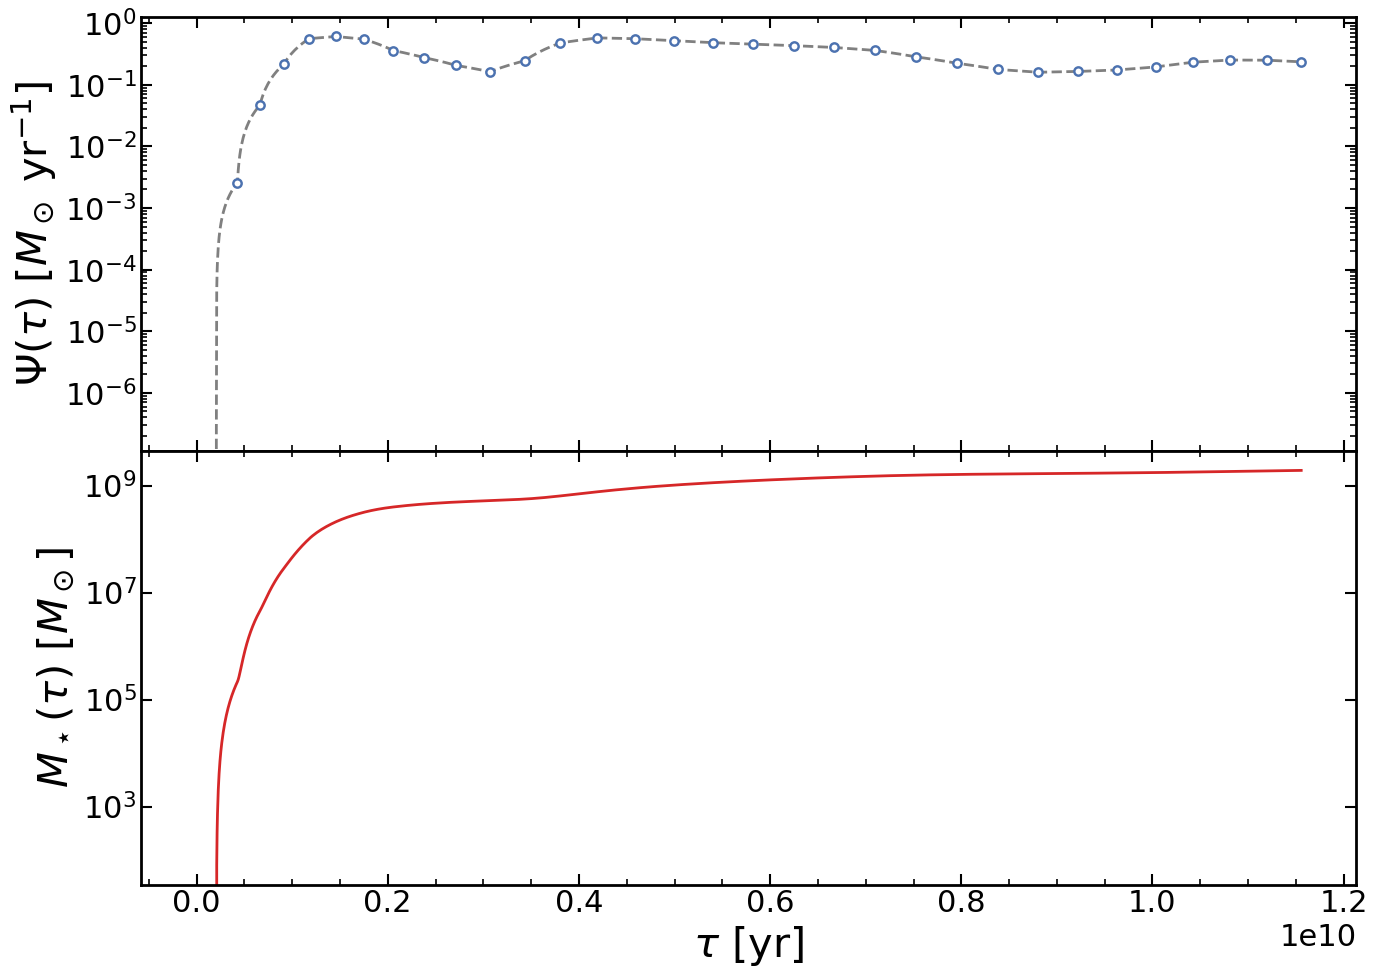

In [7]:
# make a grid of subplots
fig, axs = plt.subplots(2,1, sharex=True,
                        gridspec_kw={'hspace':0.0},
                        figsize=(14, 10),
                        tight_layout=True)

#########################################
# first sub-plot

# fix logarithmic scale for the axes and y-axis label
axs[0].set(
    #xscale='log',
    yscale='log',
    ylabel='$\\Psi(\\tau)\\ [M_\\odot\\;\\mathrm{yr}^{-1}]$'
)

# plot the interpolated model:
axs[0].plot(tt, gxy.sfh(tt),
            ls='--', color='grey') # cosmetics

# plot the SAM input values
axs[0].plot(tau, sfr,
            ls='none', marker='o', # from here just cosmetics
            markerfacecolor='white',
            markersize=6,
            markeredgewidth=1.75)

#########################################
# second sub-plot

# fix logarithmic scale for the axes and x- and y-axis labels
axs[1].set(
    #xscale='log',
    yscale='log',
    xlabel='$\\tau\\ [\\mathrm{yr}]$',
    ylabel='$M_\\star(\\tau)\\ [M_\\odot]$'
)

# also plot the evolution of the stellar mass
axs[1].plot(tt, gxy.sfh.Mstar(tt, 1000), color='tab:red')

In [8]:
print( f'{gxy.sfh.Mstar(age):.3e} Msol' )

1.917e+09 Msol


In [9]:
# array of rest-frame wavelengths
wave = gxy.wl()
# array of fluxes in mJy
flux = gxy.get_SED()

In [10]:
components = gxy.components_to_flux()

In [11]:
list(components.keys())

['stellar', 'extinct', 'MC', 'DD']

In [12]:
from galapy.analysis.plot import sed_layout, sed_components, sed_flux

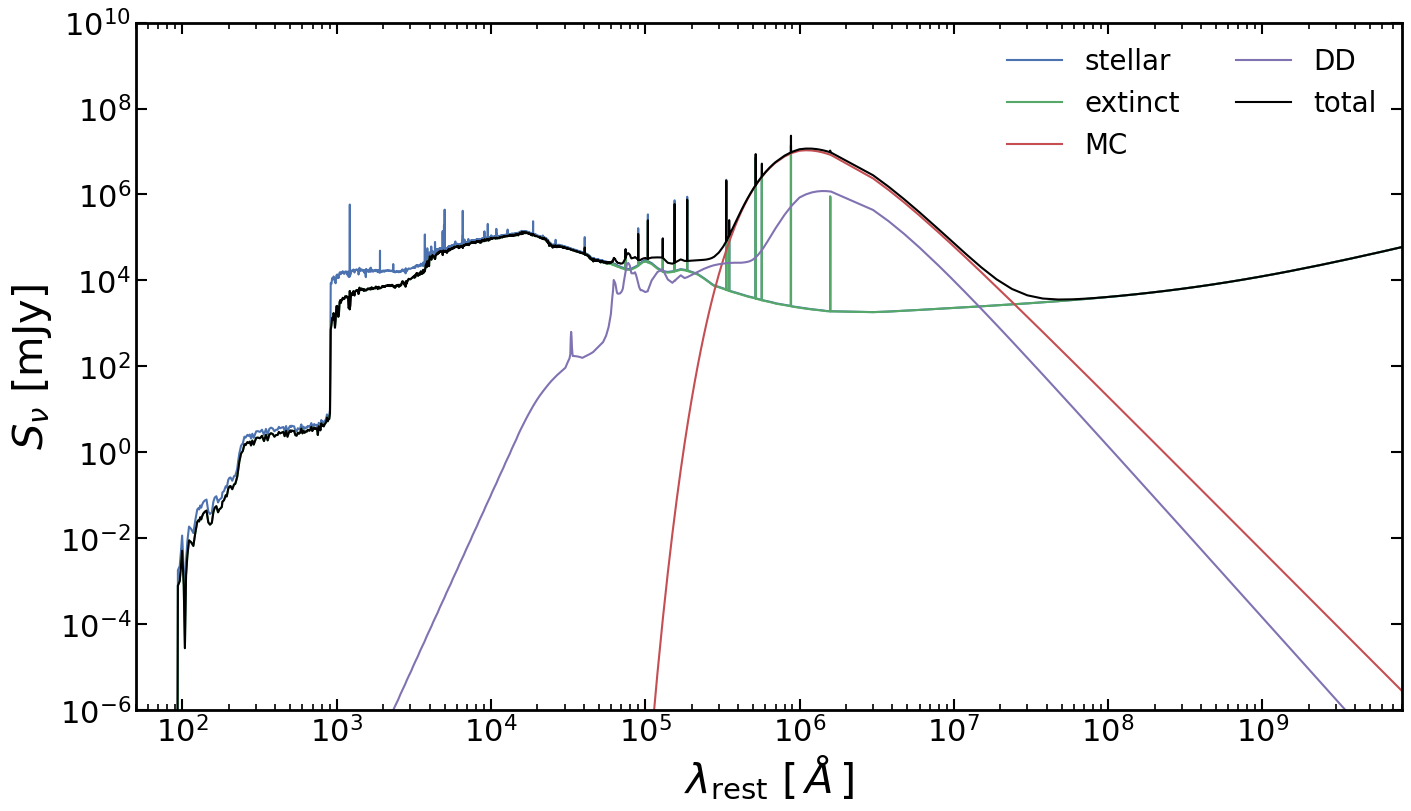

In [13]:
fig, ax = plt.subplots(1,1,figsize=(14,8), constrained_layout=True)

# prepares the plot axes
ax = sed_layout(gxy.redshift, frame='rest', ax = ax, xlim=(50., 8.e+9), ylim=(1.e-6,1.e+10))

# plot the different components
_ = sed_components(
    wave, components,
    redshift=gxy.redshift, frame='rest',
    ax=ax
)

# plot the total flux:
_ = sed_flux(
    wave, flux,
    redshift=gxy.redshift, frame='rest',
    ax=ax
)

# plot a legend
ax.legend(ncols=2)

In [14]:
from galapy.PhotometricSystem import list_filters
bands = list_filters('SDSS')+list_filters('Herschel.PACS')+list_filters('ALMA')
print(bands)

['SDSS.z', 'SDSS.i', 'SDSS.r', 'SDSS.g', 'SDSS.u', 'Herschel.PACS.blue', 'Herschel.PACS.green', 'Herschel.PACS.red', 'ALMA.B8', 'ALMA.B3', 'ALMA.B7', 'ALMA.B6']


In [15]:
from galapy.PhotometricSystem import PMS
pms = PMS(*bands)

In [16]:
lpiv = pms.lpiv
lpiv

array([3.55652397e+03, 4.70249528e+03, 6.17557888e+03, 7.48997685e+03,
       8.94670956e+03, 7.14985538e+05, 1.01855375e+06, 1.64412822e+06,
       6.96722749e+06, 9.46015413e+06, 1.24698305e+07, 3.08925524e+07])

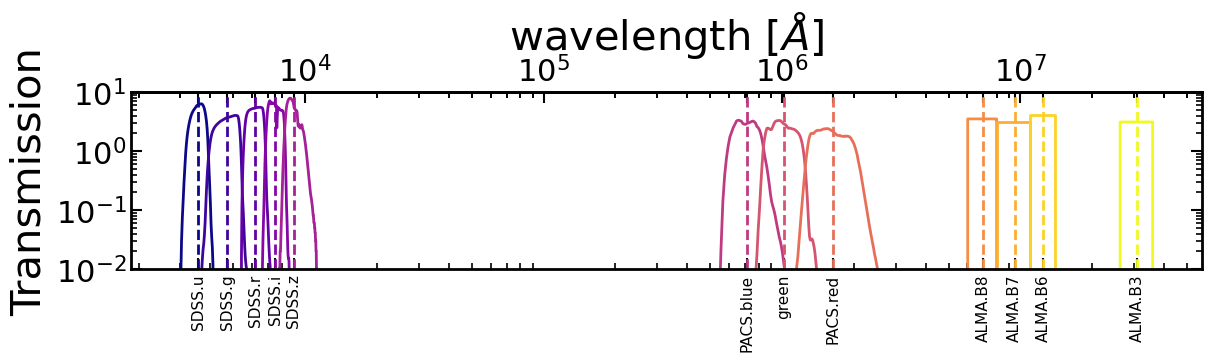

In [17]:
from galapy.analysis.plot import photometric_system as pms_plot
fig, ax = plt.subplots(1,1,figsize=(12,3.5), constrained_layout=True)
_ = pms_plot(pms, ax=ax)